 # Assignment 2
 ### Arpit Parihar
 ### 04/12/2021
 ****

 **Importing modules**

In [1]:
import warnings
import numpy as np
import pandas as pd
from pandas.core.indexes.multi import MultiIndex
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')
%pylab inline
%config InlineBackend.figure_formats = ['png']

Populating the interactive namespace from numpy and matplotlib


 ### Part A: Data Cleaning
 1\. We will increase the complexity of our model slightly by increasing the number of features. Keep the following features:
   - T_degC (water temperature)
   - Salnty (salinity of water)
   - STheta (density of water)
   - O2ml_L (milliliters of dissolved oxygen per liter of water)
   - Depthm (depth in meters)

In [2]:
data = pd.read_csv('bottle.csv')
data = data[['T_degC', 'Salnty', 'STheta', 'O2ml_L', 'Depthm']]
data.head()
data.shape

,T_degC,Salnty,STheta,O2ml_L,Depthm
0,10.50,33.440,25.649,NaN,0
1,10.46,33.440,25.656,NaN,8
2,10.46,33.437,25.654,NaN,10
3,10.45,33.420,25.643,NaN,19
4,10.45,33.421,25.643,NaN,20


(864863, 5)

 2\. Remove NaN / NA values from dataset (prior to building train/test sets) (same as HW #1):
   - Shape of your data should be: (661268, 5)

In [3]:
data_clean = data.dropna()
data_clean.head()
data_clean.shape

,T_degC,Salnty,STheta,O2ml_L,Depthm
2160,10.30,33.030,25.364,5.90,0
2161,18.46,32.920,23.568,6.02,6
2162,10.29,32.951,25.304,6.04,10
2163,10.29,32.990,25.335,6.06,15
2164,10.33,33.005,25.339,6.04,20


(661268, 5)

 3\. Remove any STheta outliers (same as HW #1).
  - Shape of your data should be: (661268, 5)
  - Note: Outliers for STheta might have been removed due to NAs in new features. Be sure to verify this on your own.

In [4]:
z_scores = (data_clean['STheta'] -
            np.mean(data_clean['STheta'])) / np.std(data_clean['STheta'])
data_clean = data_clean[z_scores < 3]
data_clean.shape

(661268, 5)

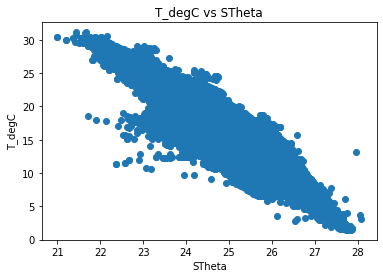

In [5]:


def plot_scatter(x, y):
    plt.scatter(x, y)
    plt.title(f'{y.name} vs {x.name}')
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()


plot_scatter(data_clean['STheta'], data_clean['T_degC'])

 ### Part B: Train / Test Split & Scaling
 1\. Create X & y objects:
   - X object should be all 4 predictors. Shape should be: (661268, 4)
   - y object should be just your target variable (T_degC): Shape should be: (661268, 1)

 Hint for y: You will need to specify the shape you want. Trying converting y to a numpy array, and then using the .reshape() method.

In [6]:
X = data_clean.drop(columns='T_degC')
y = np.array(data_clean['T_degC']).reshape(len(data_clean), 1)

 2\. Generate X_train, X_test, y_train & y_test. Use 80% for train & 20% for test.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7)

 3\. Scale all features to improve convergence in Gradient Descent. It is highly encouraged that you review the appropriate method of handling scaling with train & test data.
 You should create two new X objects:
  - X_train_scaled
  - X_test_scaled.

 Note: X_test_scaled must use the scaling parameters learned from training data.

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
pd.DataFrame([np.round(X_train_scaled.mean(axis=0), 4), np.round(X_test_scaled.mean(axis=0), 4),
              np.round(X_train_scaled.std(axis=0), 4), np.round(X_test_scaled.std(axis=0), 4)],
             columns=X_test.columns,
             index=pd.MultiIndex.from_tuples([('Mean', 'X_train_scaled'), ('Mean', 'X_test_scaled'),
                                              ('Stdev', 'X_train_scaled'), ('Stdev', 'X_test_scaled')], names=['Stat', 'Data']))

Salnty  STheta  O2ml_L  Depthm
Stat  Data                                          
Mean  X_train_scaled -0.0000 -0.0000 -0.0000  0.0000
      X_test_scaled  -0.0036 -0.0023  0.0002 -0.0004
Stdev X_train_scaled  1.0000  1.0000  1.0000  1.0000
      X_test_scaled   1.0021  1.0029  1.0004  0.9995

 ### Part C: Linear Regression with sklearn

 1\. Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train_scaled & y_train.

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train);

 2\. Print out the coefficients (including the intercept)

In [11]:
beta_sklearn = np.append(lin_reg.intercept_, lin_reg.coef_)
pd.DataFrame(beta_sklearn, index=['Intercept'] +
             list(X_train.columns), columns=['Coefficients'])

,Coefficients
Intercept,10.916864
Salnty,1.630246
STheta,-4.632983
O2ml_L,0.299913
Depthm,-0.474129


 3\. Predict T_degC for the test data using lin_reg. Make sure to use X_test_scaled!

In [12]:
y_pred_sklearn = lin_reg.predict(X_test_scaled)

 4\. Calculate the following for the test data:
   - mean squared error
   - r-squared
   - explained variance

In [13]:
print(f'Mean Squared Error = {mean_squared_error(y_test, y_pred_sklearn):.4f}')
print(f'R\N{SUPERSCRIPT TWO} = {r2_score(y_test, y_pred_sklearn):.4f}')
print(
    f'Explained Variance = {explained_variance_score(y_test, y_pred_sklearn):.4f}')

Mean Squared Error = 0.1124
R² = 0.9937
Explained Variance = 0.9937


 5\. Create a scatterplot that shows actual versus predicted values for the T_degC.

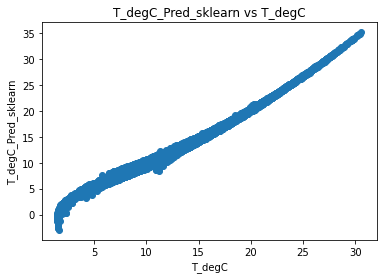

In [14]:
plot_scatter(pd.Series(y_test.flatten(), name='T_degC'), pd.Series(
    y_pred_sklearn.flatten(), name='T_degC_Pred_sklearn'))

 ### Part D: Gradient Descent Mini-Batch

 Please make sure you are using Mini-Batch! Perform the following six steps for mini-batch sizes of: 50, 250, & 2000. Save all outputs

 1\. Similar to HW #1, you will need to add a column of 1s to X_train_scaled and X_test_scaled.

 2\. The cost function we will use for Gradient Descent is MSE (refer to Equation 4-3 in Hands-On Machine Learning Chapter 4).

 Note: The Hands-on ML Github will be a helpful resource for solving Mini-Batch, but it does include a changing eta through using the learning_schedule function. Do not use a changing eta for this assignment, rather just use a static eta. This means you will need to make changes to the Github example for Mini-Batch.

 3\.  Feel free to use any value for eta and epochs, but 0.1 eta and 100 epochs should work fine for this HW.

 #### Creating class to fit linear model using mini-batch gradient descent

In [15]:


class mb_gd_lin_reg:
    def __init__(self):
        self.theta = None

    def fit(self, X_b, y, n_iterations=100, eta=0.1, minibatch_size=50):
        m = len(X_b)
        np.random.seed(7)
        self.theta = np.random.randn(X_b.shape[1], 1)  # random initialization

        for epoch in range(n_iterations):
            # Shuffling rows in data
            shuffled_indices = np.random.permutation(m)
            X_b_shuffled = X_b[shuffled_indices]
            y_shuffled = y[shuffled_indices]
            for i in range(0, m, minibatch_size):
                xi = X_b_shuffled[i:i + minibatch_size]
                yi = y_shuffled[i:i + minibatch_size]
                gradients = 2 / minibatch_size * \
                    xi.T.dot(xi.dot(self.theta) - yi)
                self.theta = self.theta - eta * gradients

    def predict(self, X_test):
        return X_test.dot(self.theta)

# Class for formatting print statements


class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'



 #### Adding intercept column to train and test datasets and defining number of epochs and learning rate

In [16]:
X_train_gd = np.hstack((np.ones((len(X_train_scaled), 1)), X_train_scaled))
X_test_gd = np.hstack((np.ones((len(X_test_scaled), 1)), X_test_scaled))
epochs = 100
eta = 0.1

 #### Fitting models with mini-batch size = \[50, 250, 2000\]

In [17]:
lin_reg_gd = {}
mbs = [50, 250, 2000]

for mb in mbs:
    lin_reg_gd[mb] = mb_gd_lin_reg()
    lin_reg_gd[mb].fit(X_train_gd, y_train, epochs, eta, mb)


 #### Printing coefficients for all 3 models

In [18]:
for mb in mbs:
    if mb != mbs[0]: print('\n' + '-' * 30 + '\n')
    print(color.UNDERLINE + color.BOLD +
          f'\nMini-batch size = {mb}\n' + color.END)
    pd.DataFrame(lin_reg_gd[mb].theta, index=['Intercept'] +
                 list(X_train.columns), columns=['Coefficients'])


Mini-batch size = 50



,Coefficients
Intercept,10.938044
Salnty,1.692715
STheta,-4.690609
O2ml_L,0.294744
Depthm,-0.505465



------------------------------


Mini-batch size = 250



,Coefficients
Intercept,10.921194
Salnty,1.637068
STheta,-4.654238
O2ml_L,0.297716
Depthm,-0.471098



------------------------------


Mini-batch size = 2000



,Coefficients
Intercept,10.916072
Salnty,1.630123
STheta,-4.636772
O2ml_L,0.300432
Depthm,-0.471156


 #### Making predictions for test and train datasets

In [19]:
y_pred_gd = {}
y_pred_gd_train = {}

for mb in mbs:
    y_pred_gd_train[mb] = lin_reg_gd[mb].predict(X_train_gd)
    y_pred_gd[mb] = lin_reg_gd[mb].predict(X_test_gd)

 4\. Calculate the following for the test data:
   - mean squared error
   - r-squared
   - explained variance

In [20]:
for mb in mbs:
    if mb != mbs[0]: print('\n' + '-' * 30 + '\n')
    print(color.UNDERLINE + color.BOLD +
          f'\nMini-batch size = {mb}\n' + color.END)
    print(
        f'Mean Squared Error = {mean_squared_error(y_test, y_pred_gd[mb]):.5f}')
    print(f'R\N{SUPERSCRIPT TWO} = {r2_score(y_test, y_pred_gd[mb]):.5f}')
    print(
        f'Explained Variance = {explained_variance_score(y_test, y_pred_gd[mb]):.5f}')


Mini-batch size = 50

Mean Squared Error = 0.11644
R² = 0.99350
Explained Variance = 0.99353

------------------------------


Mini-batch size = 250

Mean Squared Error = 0.11275
R² = 0.99371
Explained Variance = 0.99371

------------------------------


Mini-batch size = 2000

Mean Squared Error = 0.11244
R² = 0.99372
Explained Variance = 0.99372


 5\. Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.


Mini-batch size = 50



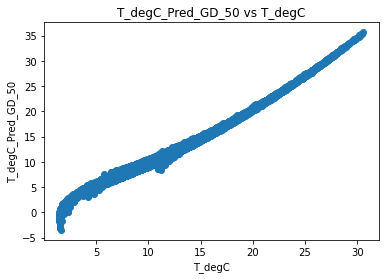


--------------------------------------------------


Mini-batch size = 250



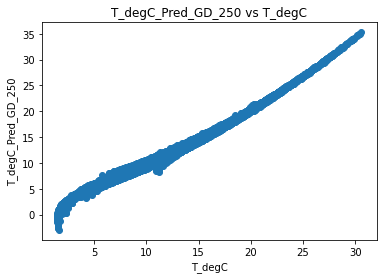


--------------------------------------------------


Mini-batch size = 2000



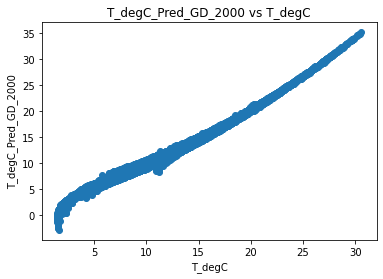

In [21]:
for mb in mbs:
    if mb != mbs[0]: print('\n' + '-' * 50 + '\n')
    print(color.UNDERLINE + color.BOLD +
          f'\nMini-batch size = {mb}\n' + color.END)
    plot_scatter(pd.Series(y_test.flatten(), name='T_degC'), pd.Series(
        y_pred_gd[mb].flatten(), name=f'T_degC_Pred_GD_{mb}'))


 6\. Given we are estimating parameters through gradient descent we also want to check how our error metrics look for training data. Calculate the following for the training data:
   - mean squared error
   - r-squared
   - explained variance

In [22]:
for mb in mbs:
    if mb != mbs[0]: print('\n' + '-' * 30 + '\n')
    print(color.UNDERLINE + color.BOLD +
          f'\nMini-batch size = {mb}\n' + color.END)
    print(
        f'Mean Squared Error = {mean_squared_error(y_train, y_pred_gd_train[mb]):.5f}')
    print(
        f'R\N{SUPERSCRIPT TWO} = {r2_score(y_train, y_pred_gd_train[mb]):.5f}')
    print(
        f'Explained Variance = {explained_variance_score(y_train, y_pred_gd_train[mb]):.5f}')


Mini-batch size = 50

Mean Squared Error = 0.11388
R² = 0.99361
Explained Variance = 0.99364

------------------------------


Mini-batch size = 250

Mean Squared Error = 0.11046
R² = 0.99380
Explained Variance = 0.99381

------------------------------


Mini-batch size = 2000

Mean Squared Error = 0.11026
R² = 0.99382
Explained Variance = 0.99382


 ### Part E: Conceptual Questions

 **1\. Describe how parameter estimation in Gradient Descent differs from using the normal equation.**

 Normal equation is a result of minimizing the loss function by taking its partial derivatives and equating them to 0 with all of the data to get the optimal values of thetas. There are no iterations involved, the solution is deterministic, and the complexity of the algorithm increases with increase in number of features, as matrix inverse needs to be computed.

 Gradient descent, on the other hand, finds the optimal value of thetas by iteratively minimizing the loss function. The values of theta are initialized randomly, and the gradient of the loss function at the current theta values is subtracted from it, scaled by a constant called learning rate, which optimizes computation time all the while ensuring convergence and controlling overfitting.

 **2\. We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?**

 Mini-batch Gradient Descent uses a small batch of data to calculate gradient at every step, while Stochastic Gradient Descent uses a single, randomly picked observation to calculate the gradient at each step.

 SGD is very fast, but the cost function doesn't smoothly arrive at the minima, instead, it is erratic, and estimates sub-optimal theta values. Mini-batch GD combines the reliability of batch gradient descent and the speed of SGD to arrive very close to the minimum in a fairly smooth manner.

 SGD is preferrable in cases where the loss function itself isn't smooth, and the erratic nature of the updates might make the algorithms jump out of a local minima and find the global one.

 **3\. Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain.**

 Of the 3 batch sizes, the model with mini-batch size 2000 performs the best on test data. The model doesn't show signs of overfitting, as even with different random seeds, the difference b/w the training and test error is very small, and the model generalizes very well.

 **4\. Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?**

 Learning rate is a hyperparameter to control the step size when finding the minima of the loss function using gradient descent. If the learning rate is too small, the algorithm will take too long to converge, while if it's too large, the algorithm might miss the minima completely, and might even diverge.

 It's helpful to change the learning rate over time as initially, we need the step size to be larger, when we are far away from the minima, and get smaller as we approach it. This is especially useful for SGD as the larger step sizes at the onset allow the algorithm to skip local minima, and the smaller step sizes towards the end ensure that the algortihm setlles close to the global minima.

 **5\. Why would a data scientist want to use early stopping in gradient descent?**

 Early stopping is a regularization technique where the algorithm is stopped when validation error starts rising. It is used to prevent overfitting, as by not letting the algorithm minimize the loss function to its absolute minimum, we introduce a little bias in the model, but reduce variance by a lot, leading to better generalization.